In [3]:
import os
import joblib    # model.pkl로드
import pandas as pd

In [4]:
# 1. 경로설정

shared_dir = "/home/jovyan/work/shared"
model_path = os.path.join(shared_dir, "model.pkl")
test_path = os.path.join(shared_dir, "mission15_test.csv")
out_path = os.path.join(shared_dir, "result.csv")

In [5]:
# 2. 파일 존재 점검
assert os.path.exists(model_path), f"모델 없음: {model_path}"
assert os.path.exists(test_path), f"테스트 데이터 없음: {test.path}"

In [7]:
# 3. 로드 & 데이터 읽기
model = joblib.load(model_path)
# 전처리 + 모델 결합된 파이프 라인 로드임

test_df = pd.read_csv(test_path)

In [8]:
# 4. 컬럼확인 : 학습 시 사용하는 피처가 다 있는지 확인

expected_features = [
    "Hours Studied",
    "Previous Scores",
    "Extracurricular Activities",
    "Sleep Hours",
    "Sample Question Papers Practiced",
]
missing = [c for c in expected_features if c not in test_df.columns]
assert not missing, f"테스트 데이터에 누락 컬럼 있음: {missing}"

In [10]:
# 예측 수정

# 파이프라인이 내부에서 전처리 -> 예측까지 자동 수행
pred = model.predict(test_df)


In [12]:
# 6. 결과 저장
result_df = test_df.copy()    # 원본 보존 + 예측값 붙이기
result_df["Predicted Performance Index"] = pred
# 엑셀 호환용
result_df.to_csv(out_path, index=False, encoding="utf-8-sig")

print(f"[DONE] 추론 완료 -> {out_path}")

[DONE] 추론 완료 -> /home/jovyan/work/shared/result.csv


In [13]:
display(result_df.head())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Predicted Performance Index
0,7,99,Yes,9,1,89.581667
1,8,51,Yes,7,2,44.243333
2,8,91,No,4,5,86.074167
3,5,79,No,7,8,66.436083
4,2,72,No,4,3,49.315000


In [14]:
# 결과 통계 요약 
result_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Predicted Performance Index
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.093000,69.483000,6.530667,4.527000,55.577590
std,2.583907,17.471237,1.695489,2.875882,19.260615
min,1.000000,40.000000,4.000000,0.000000,12.195000
25%,3.000000,54.000000,5.000000,2.000000,40.596250
50%,5.000000,69.000000,7.000000,5.000000,55.527500
75%,7.000000,85.000000,8.000000,7.000000,71.040000
max,9.000000,99.000000,9.000000,9.000000,98.690000


In [17]:
import matplotlib
import pandas as pd
import numpy as np
print("matplotlib:", matplotlib.__version__)  # 설치 버전 확인 목적임
print("pandas:", pd.__version__)              # pandas 버전 확인 목적임
print("numpy:", np.__version__)               # numpy 버전 확인 목적임

matplotlib: 3.8.4
pandas: 2.2.2
numpy: 1.26.4


Text(0, 0.5, 'Frequency')

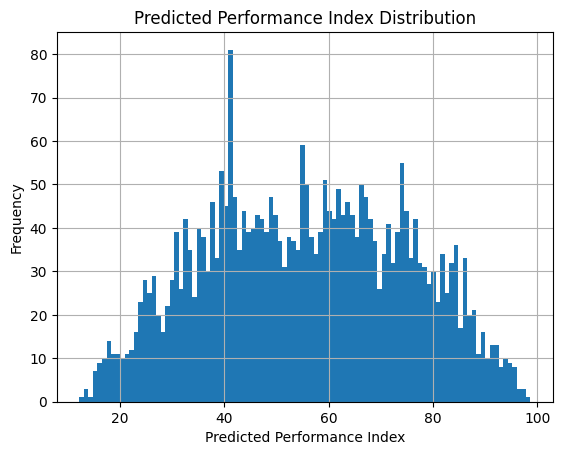

In [29]:
# 히스토그램으로 확인 - 예측분포
ax = result_df["Predicted Performance Index"].hist(bins=100)
ax.set_title("Predicted Performance Index Distribution")
ax.set_xlabel("Predicted Performance Index")
ax.set_ylabel("Frequency")

In [33]:
mask = (result_df["Predicted Performance Index"] >= 40) & (result_df["Predicted Performance Index"] < 44)
subset = result_df[mask]
print("40~44 구간 데이터 개수:", len(subset))
subset.describe()

40~44 구간 데이터 개수: 238


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Predicted Performance Index
count,238.00000,238.000000,238.000000,238.000000,238.000000
mean,5.02521,56.247899,6.428571,4.361345,41.879862
std,2.49036,7.267747,1.738477,2.977358,1.115074
min,1.00000,43.000000,4.000000,0.000000,40.001667
25%,3.00000,51.000000,5.000000,2.000000,40.961062
50%,5.00000,56.000000,6.000000,4.000000,41.620208
75%,7.00000,62.000000,8.000000,7.000000,42.804833
max,9.00000,70.000000,9.000000,9.000000,43.975000


In [43]:
# 1-2) model.pkl 내부 모델 타입 확인 셀임
import joblib                                                         
# 모델 로드용 임포트임
model = joblib.load(f"{shared}/model.pkl")                            
# 파이프라인 로드임

print(model)                                                          
# 전체 파이프라인 구조 출력임

# 트리 기반(RandomForest/GradientBoosting 등) 여부를 육안 확인 목적임
# 예: Pipeline(steps=[('preprocess', ...), ('model', RandomForestRegressor(...))])


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('rf',
  

### **“이상치(outlier)”는 아님**

- `describe()` 결과상 **평균(55.6)** 과 **표준편차(19.26)** 모두 정상 범위
- 즉 “42 근처 피크”는 **데이터 이상이 아니라 예측값의 비연속성(discretization)** 이 원인임.
- 모델이 특정 범위(중간 점수대)에서 출력이 덜 세밀할 뿐, 이상치는 아님.